
# Project: Investigate a Dataset - [Sales Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

About the Dataset
The dataset consists of 11 columns, each column representing an attribute of purchase on a product:



Order ID - A unique ID for each order placed on a product



Product - Item that is purchased



Quantity Ordered - Describes how many of that products are ordered



Price Each - Price of a unit of that product



Order Date - Date on which the order is placed



Purchase Address - Address to where the order is shipped



Month, Sales, City, Hour - Extra attributes formed from the above.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv("Sales Data.csv")

df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
# Getting more info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [4]:
# Convert "Date" column to date format

df["Order Date"] = pd.to_datetime(df['Order Date'])

In [5]:
# Getting the number of missing values

df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
# Getting the number of duplicated values

df.duplicated().sum()

0


### Data Cleaning


AS WE SEE ABOVE THERE IS NO NEED TO CLEAN THE DATA SINCE WE HAVE NO MISSING OR DUPLICATED VALUES

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question (What is the Quantity Ordered distribution?)

In [7]:
# Getting stats about the data

df.describe().round()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour
count,185950.0,185950.0,185950.0,185950.0,185950,185950.0,185950.0,185950.0
mean,8340.0,230418.0,1.0,184.0,2019-07-18 21:54:38.887550464,7.0,185.0,14.0
min,0.0,141234.0,1.0,3.0,2019-01-01 03:07:00,1.0,3.0,0.0
25%,3894.0,185831.0,1.0,12.0,2019-04-16 21:05:15,4.0,12.0,11.0
50%,7786.0,230368.0,1.0,15.0,2019-07-17 20:40:30,7.0,15.0,15.0
75%,11872.0,275036.0,1.0,150.0,2019-10-26 08:14:00,10.0,150.0,19.0
max,25116.0,319670.0,9.0,1700.0,2020-01-01 05:13:00,12.0,3400.0,23.0
std,5451.0,51513.0,0.0,333.0,NaN,4.0,333.0,5.0


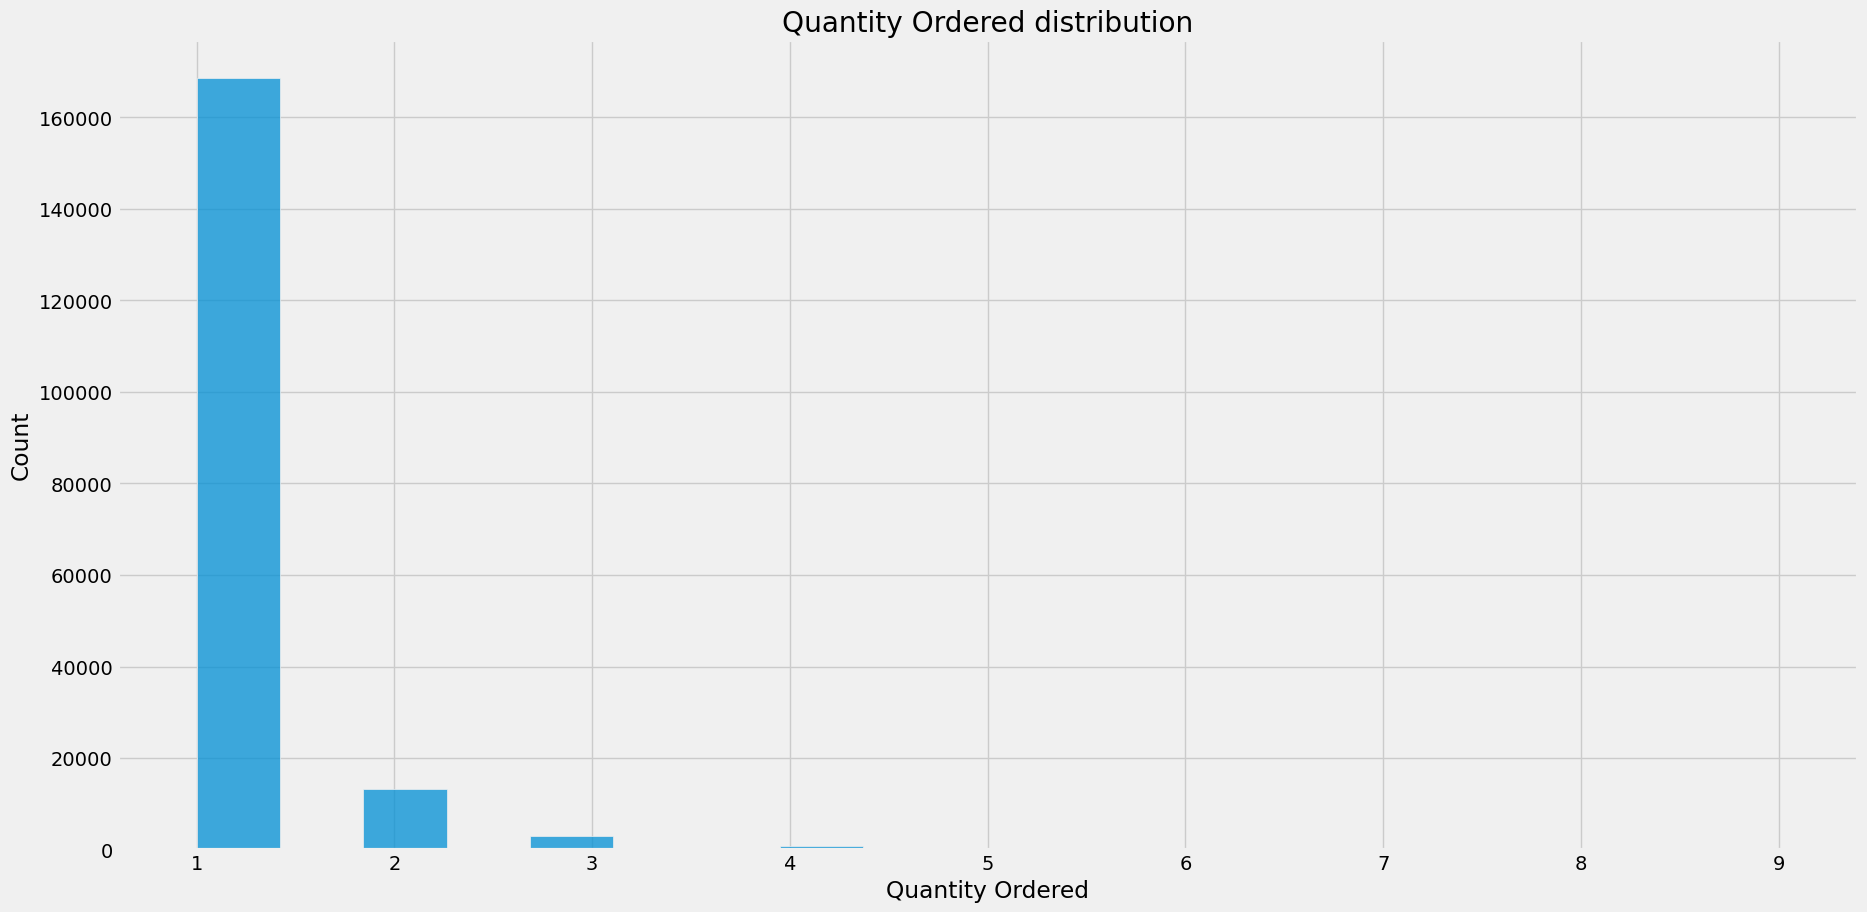

In [8]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="Quantity Ordered")
plt.title("Quantity Ordered distribution");

### Research Question (How many units of different products are ordered?)

In [9]:
product_grp = df.groupby("Product")

In [10]:
top_orders = product_grp["Quantity Ordered"].sum().round()

top_orders = top_orders.reset_index()

top_orders

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


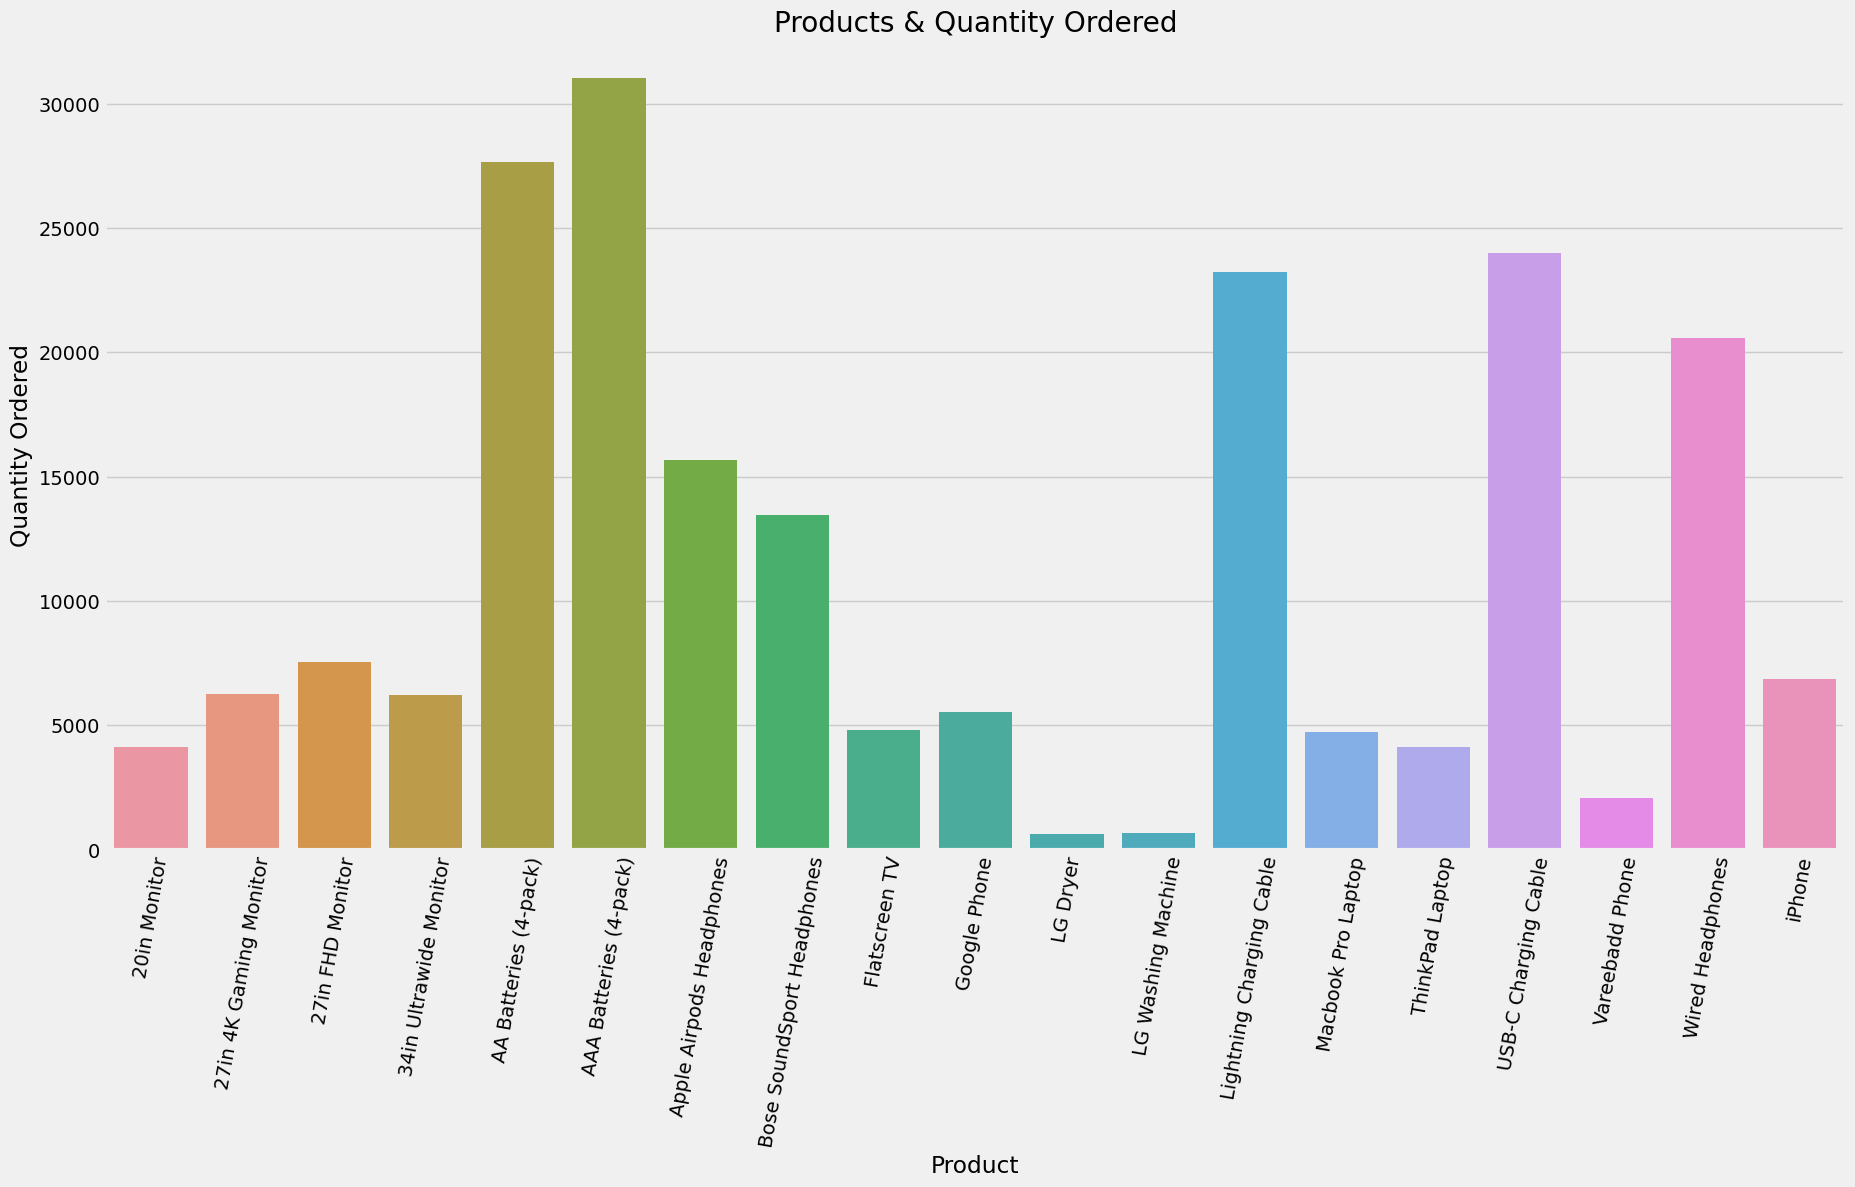

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x="Product", y="Quantity Ordered", data=top_orders)
plt.xticks(rotation = 80)
plt.title("Products & Quantity Ordered");

### Research Question (What is the sales distribution?)

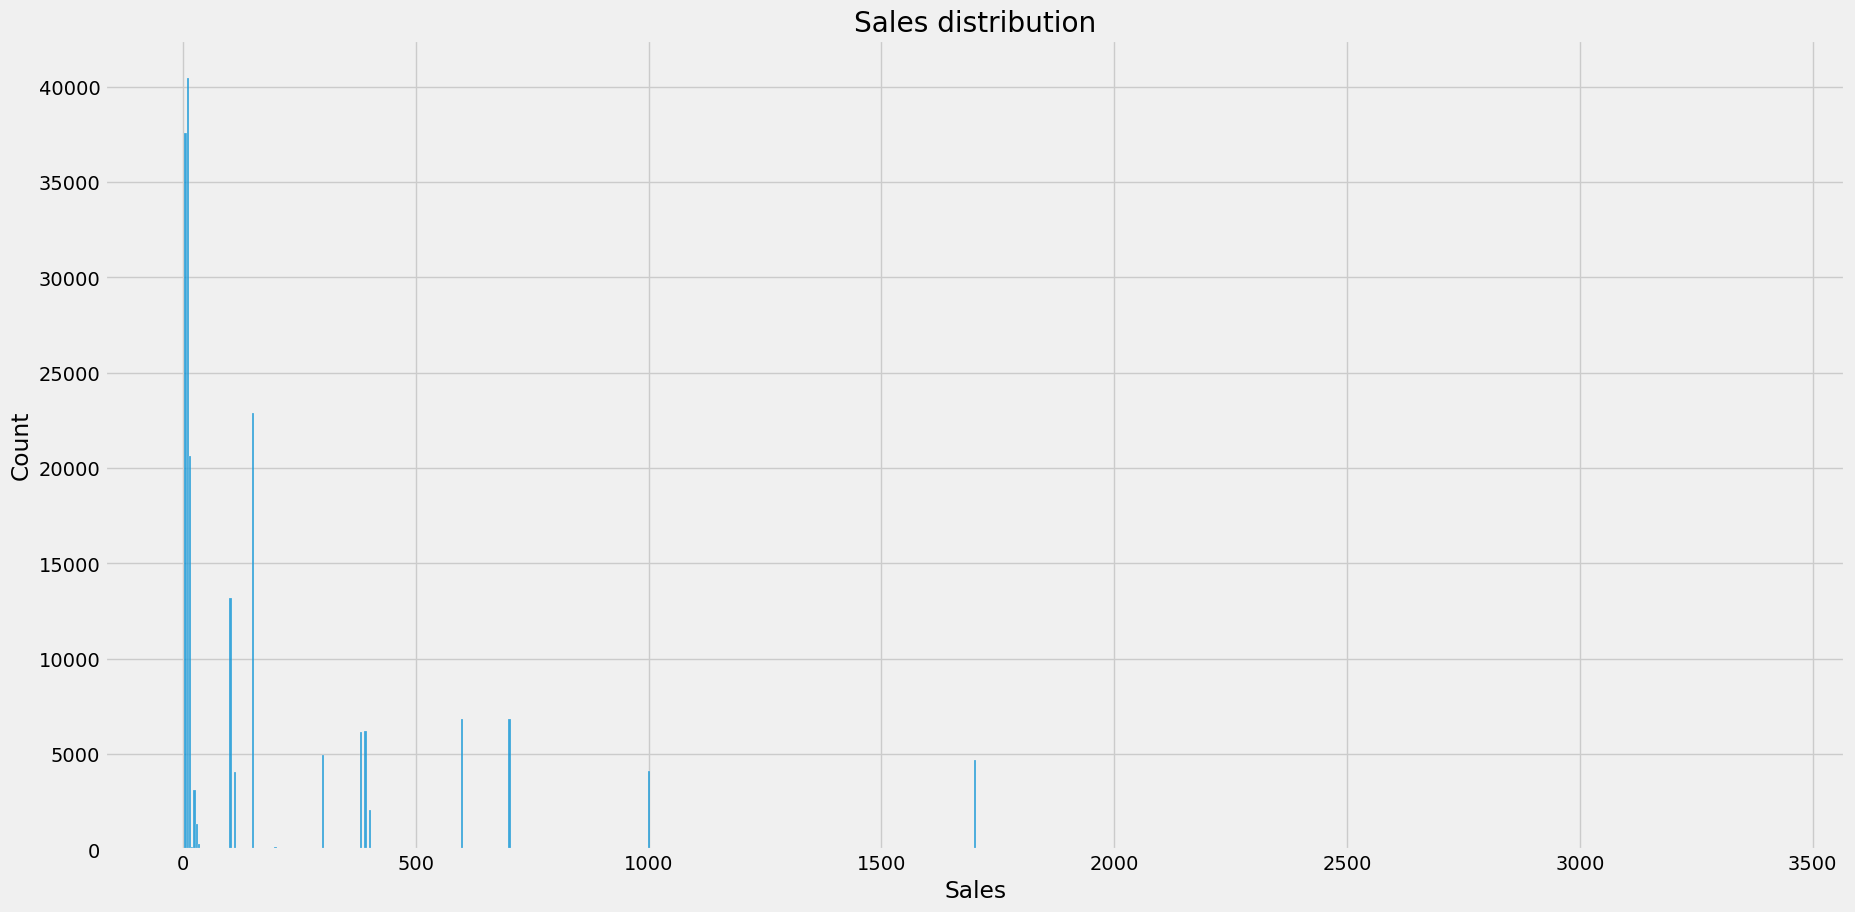

In [12]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="Sales")
plt.title("Sales distribution");

### Research Question 3  (What are the top 10 best-selling products?)

In [13]:
top_sales = product_grp["Sales"].sum().round()

top_sales = top_sales.reset_index()

top_sales_2 = top_sales.nlargest(10, "Sales")
top_sales_2

,Product,Sales
13,Macbook Pro Laptop,8037600.0
18,iPhone,4794300.0
14,ThinkPad Laptop,4129959.0
9,Google Phone,3319200.0
1,27in 4K Gaming Monitor,2435098.0
3,34in Ultrawide Monitor,2355558.0
6,Apple Airpods Headphones,2349150.0
8,Flatscreen TV,1445700.0
7,Bose SoundSport Headphones,1345565.0
2,27in FHD Monitor,1132424.0


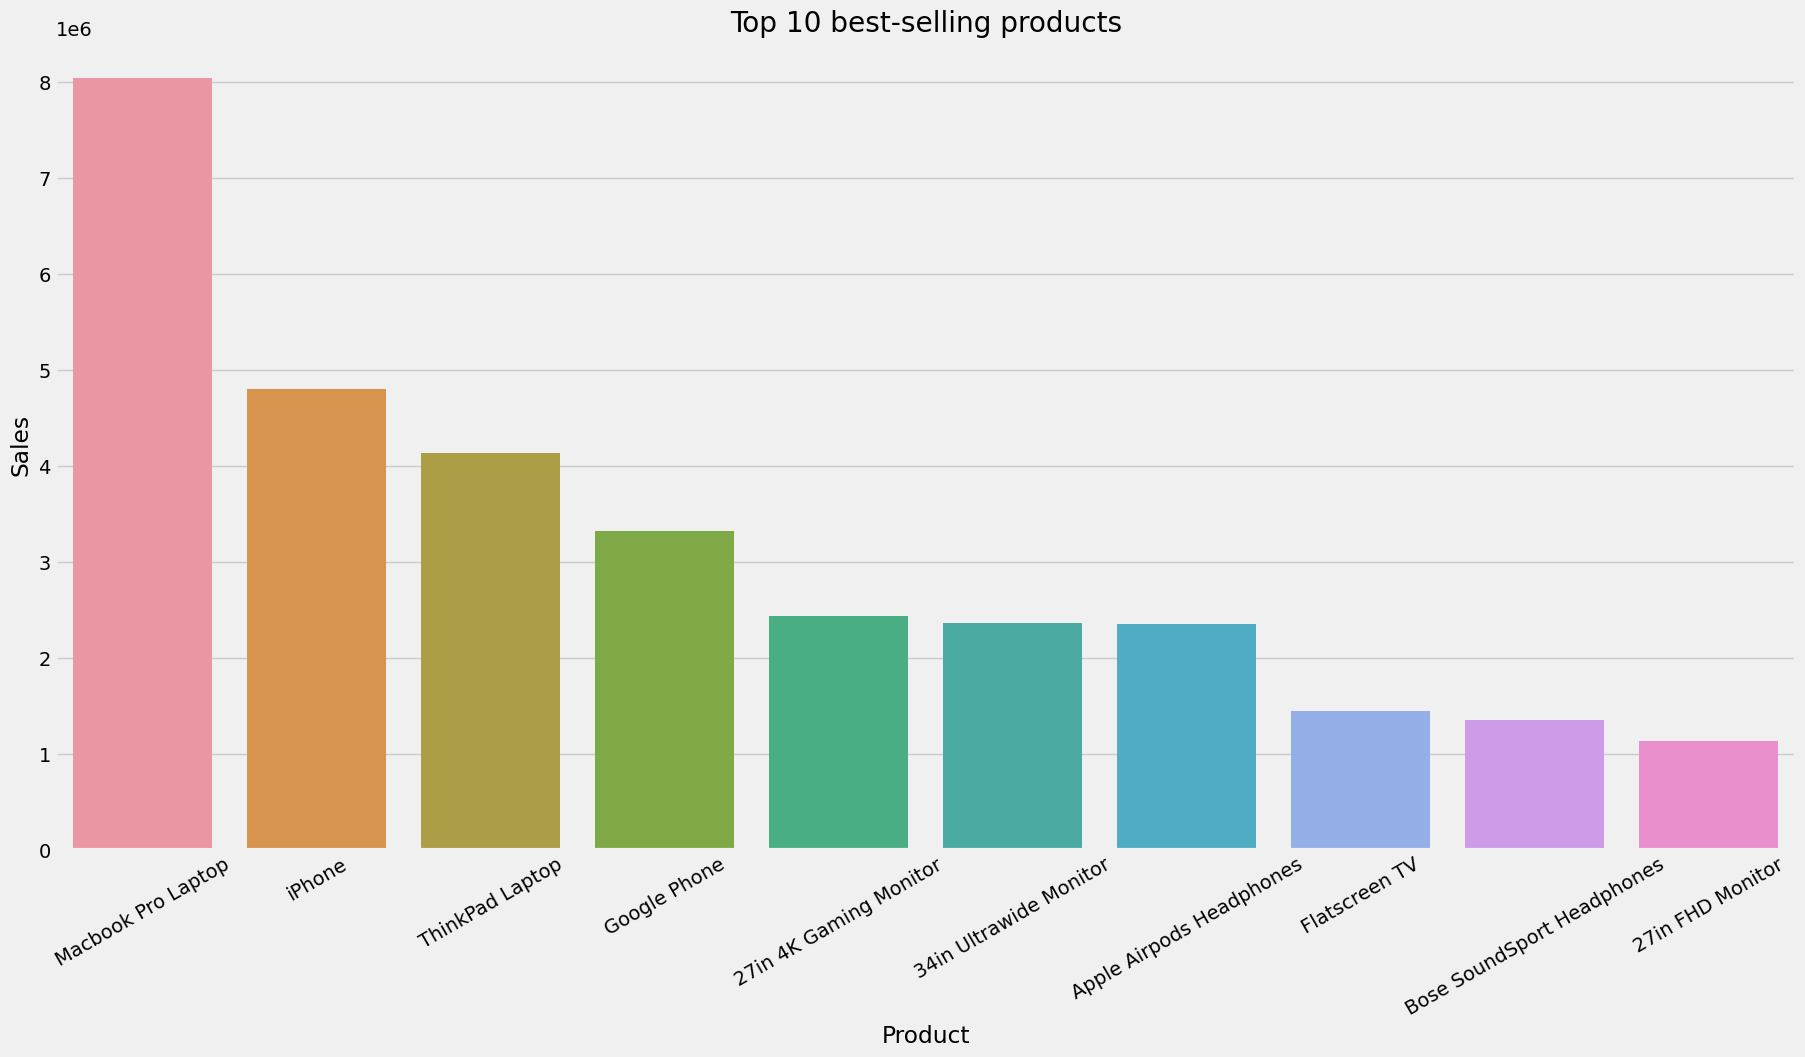

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x="Product", y="Sales", data=top_sales_2)
plt.xticks(rotation = 30)
plt.title("Top 10 best-selling products");

### Research Question (What is the total sales in the different months?)

In [15]:
months_grp = df.groupby("Month")

month_sales = months_grp["Sales"].sum().round()

month_sales = month_sales.reset_index()

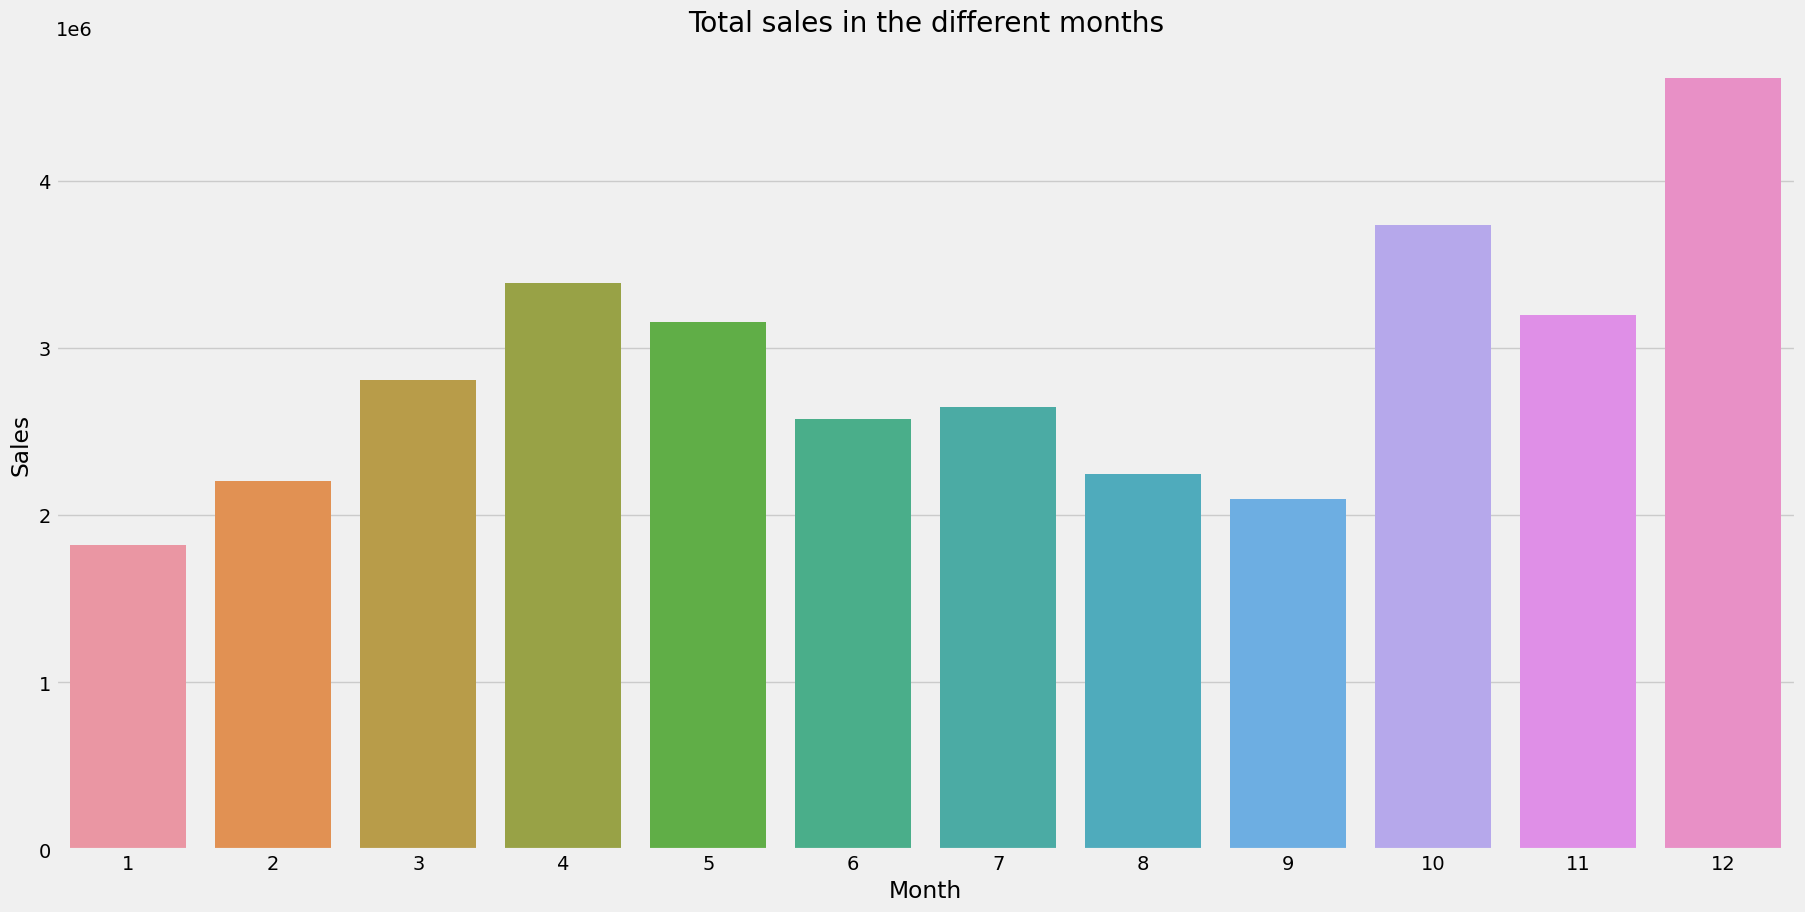

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x="Month", y="Sales", data=month_sales)
plt.title("Total sales in the different months");

### Research Question (What is the total sales in the different cites?)

In [17]:
city_grp = df.groupby("City")

city_sales = city_grp["Sales"].sum().round()

city_sales = city_sales.reset_index()

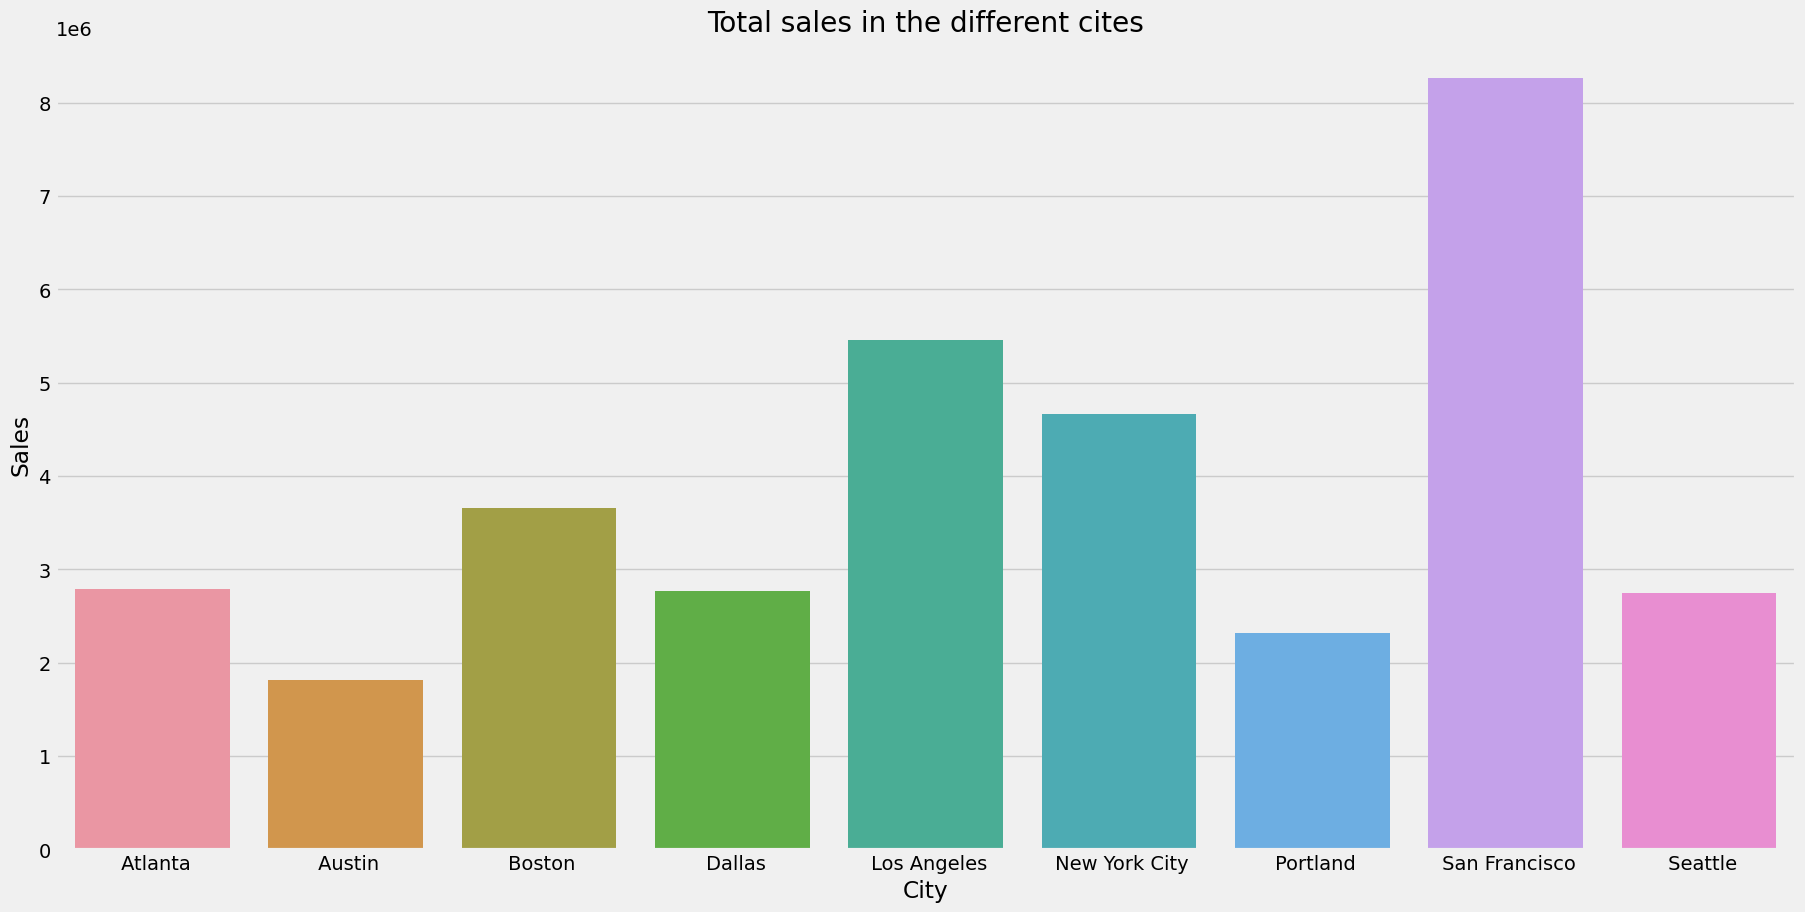

In [18]:
plt.figure(figsize=(20,10))
sns.barplot(x="City", y="Sales", data=city_sales)
plt.title("Total sales in the different cites");

### Research Question (What is the total Quantity Ordered in the different hours?)

In [19]:
hour_grp = df.groupby("Hour")

order_hour = hour_grp["Quantity Ordered"].sum().round()

order_hour = order_hour.reset_index()

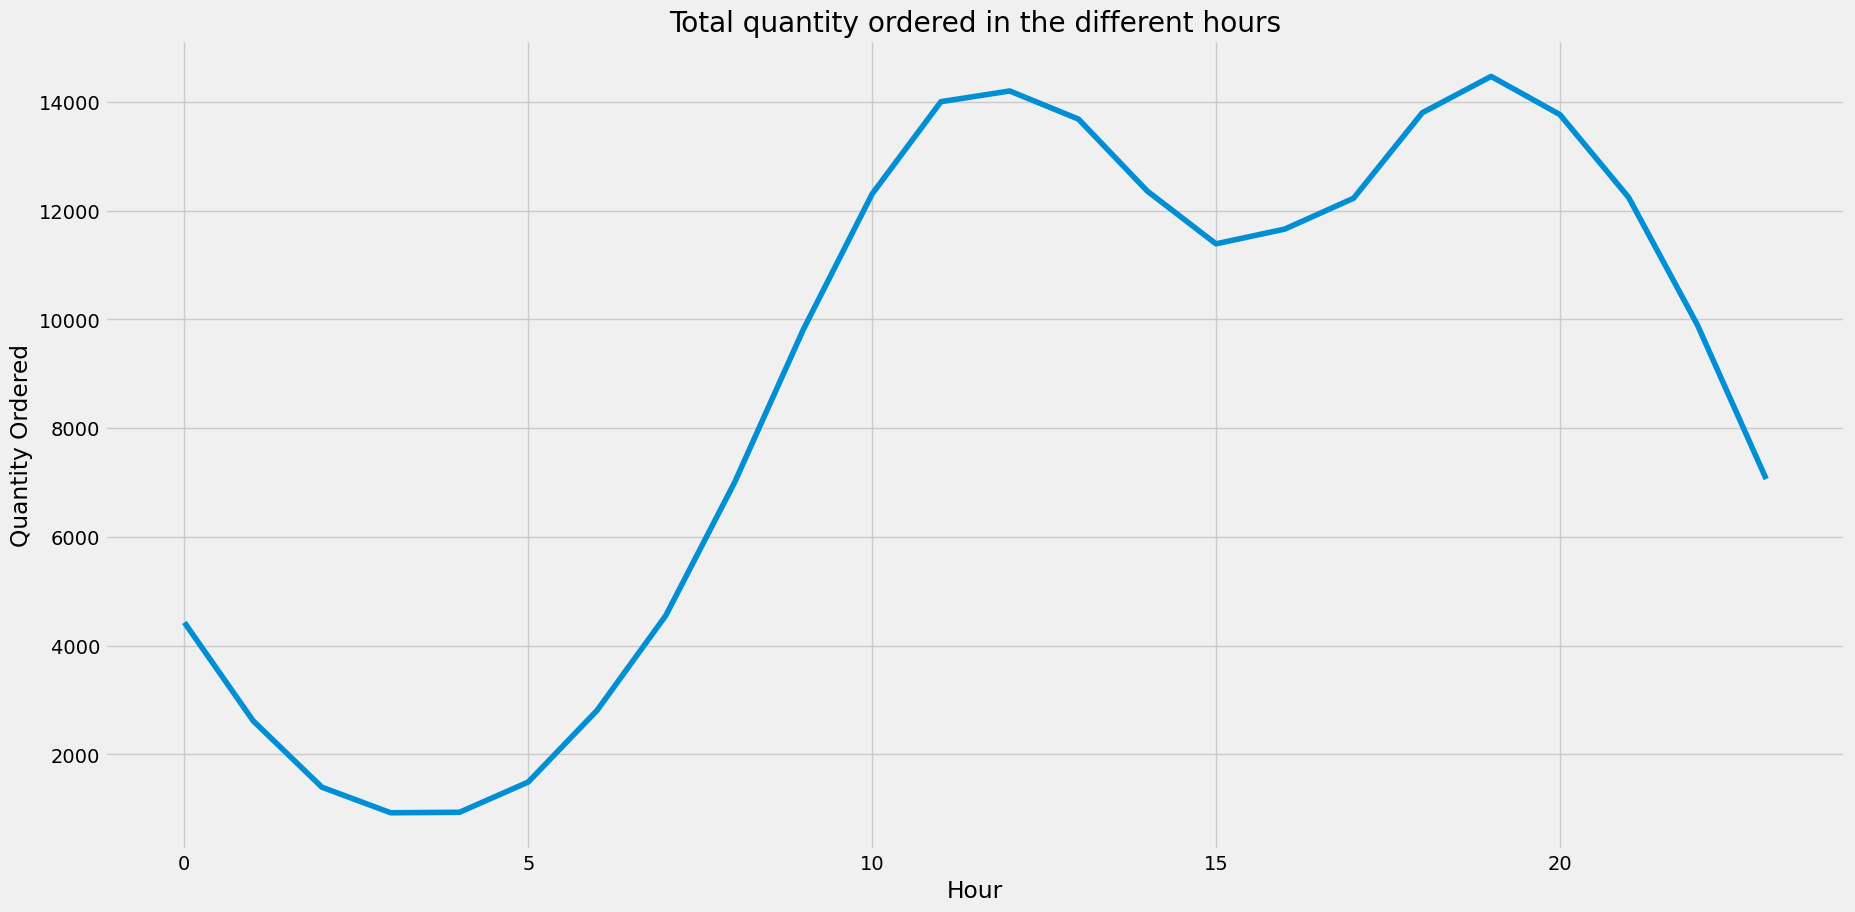

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Hour", y="Quantity Ordered", data=order_hour)
plt.title("Total quantity ordered in the different hours");

### Research Question 7  (What is the total sales in the different hours?)

In [21]:
sales_hour = hour_grp["Sales"].sum().round()

sales_hour = sales_hour.reset_index()

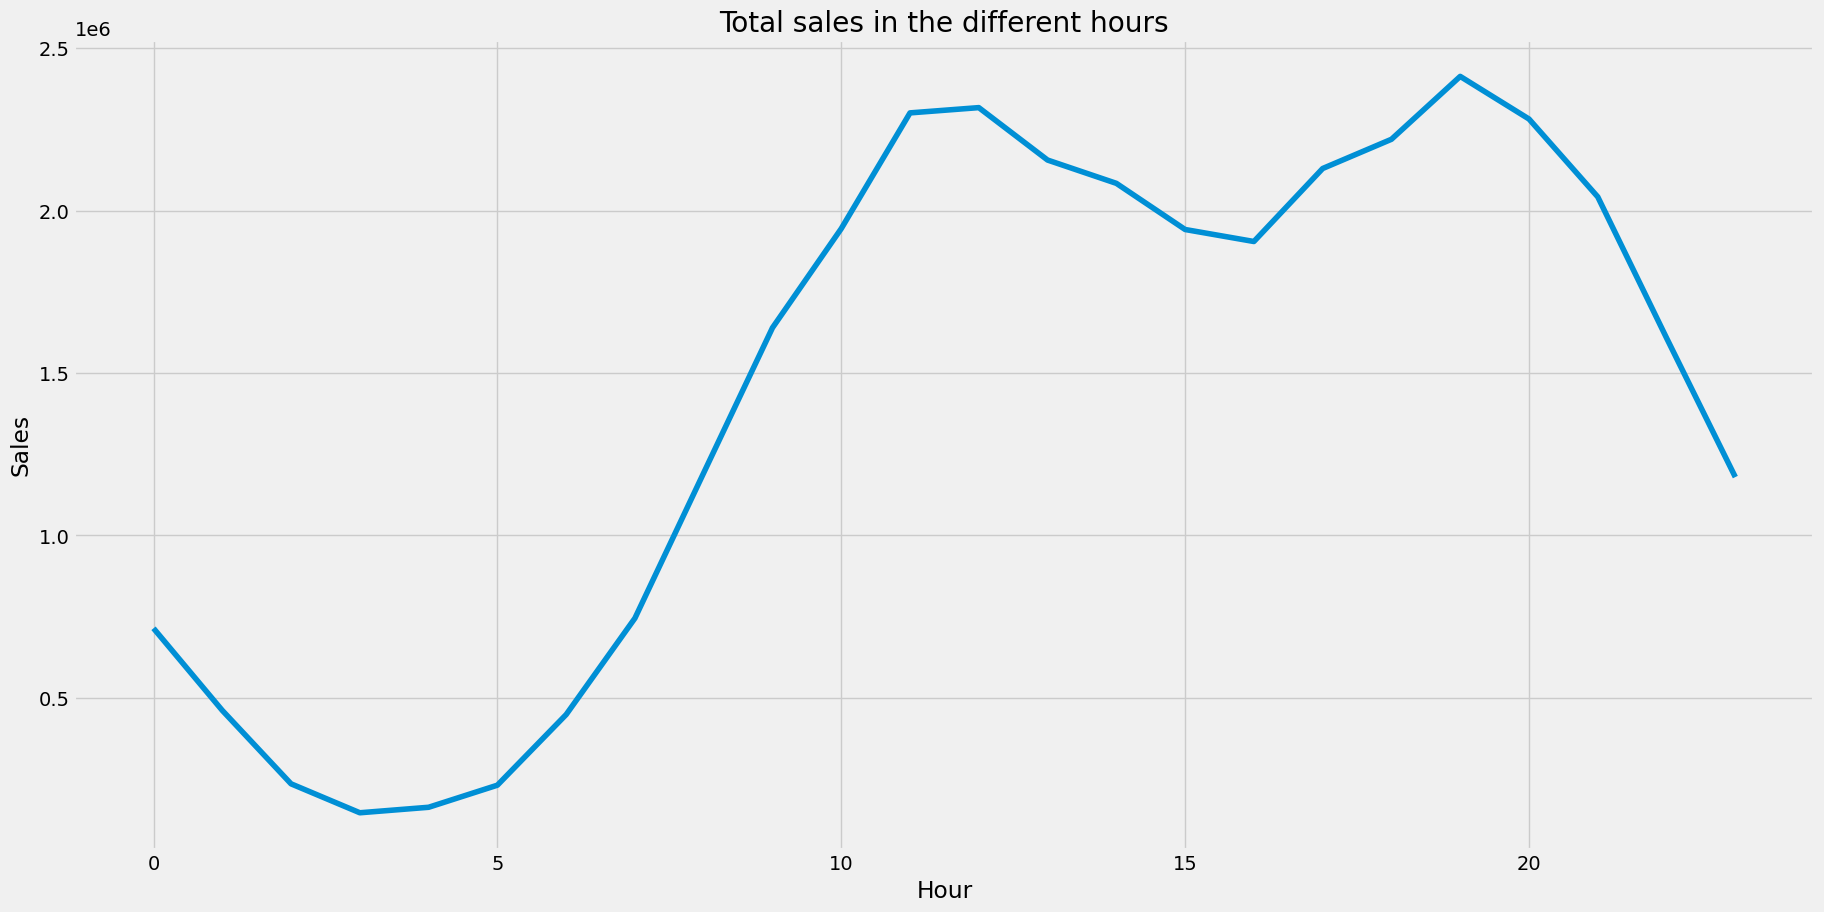

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Hour", y="Sales", data=sales_hour)
plt.title("Total sales in the different hours");

### Research Question (On what date was there an increase in sales?)

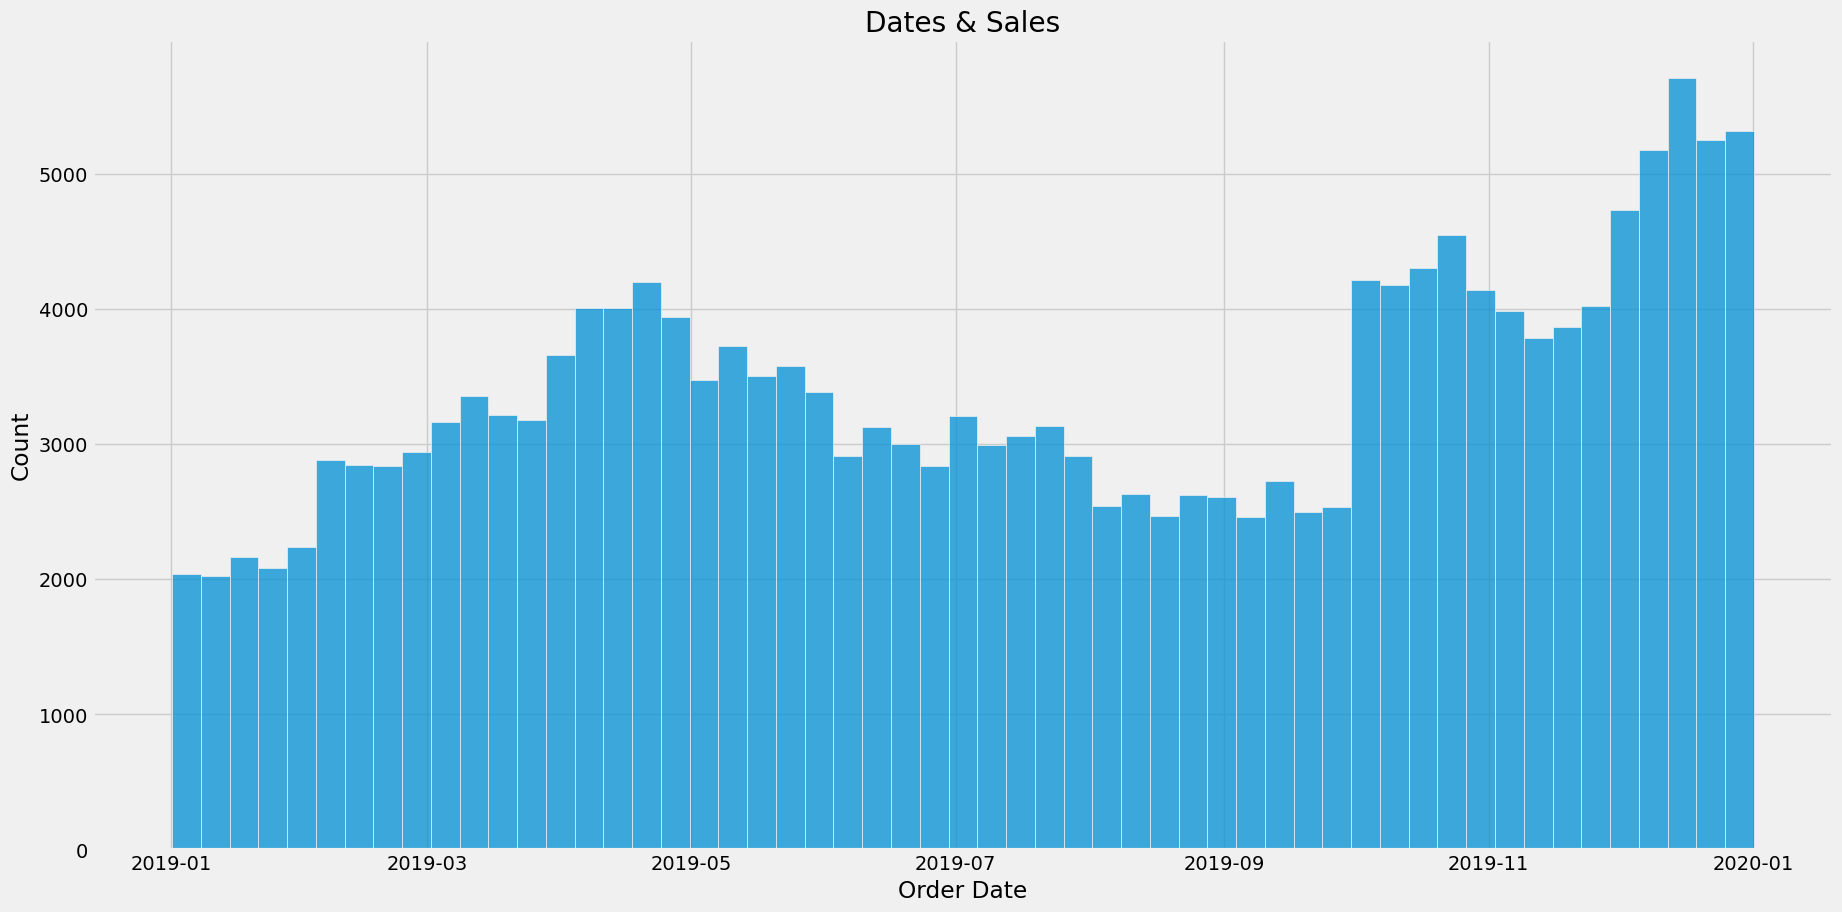

In [23]:
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="Order Date")
plt.title("Dates & Sales");

<a id='conclusions'></a>
## Conclusions

> **First**: The top three best selling products are: Macbook pro laptop, Iphone laptop and thinkpad laptop.

> **Second**: There is an increase in sales in the last three months of the year.


> **Third**: San Francisco, Los Angeles, and New York City are the three cities with the highest total sales.


> **Fourth**: There is an increase in sales and quantity demanded in the hours between 10 a.m. and 8 p.m.


> **Fiveth**: Most sales were under $500.